In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import os

from scipy.stats import linregress
from scipy import stats

In [24]:
# read in csvs
circuits = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/circuits.csv", na_values=r'\N')
constructor_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_results.csv", na_values=r'\N')
constructor_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructor_standings.csv", na_values=r'\N')
constructors = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/constructors.csv", na_values=r'\N')
driver_standings = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/driver_standings.csv", na_values=r'\N')
drivers = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/drivers.csv", na_values=r'\N')
pit_stops = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/pit_stops.csv", na_values=r'\N')
qualifying = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/qualifying.csv", na_values=r'\N')
races = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/races.csv", na_values=r'\N')
seasons = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/seasons.csv", na_values=r'\N')
sprint_results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/sprint_results.csv", na_values=r'\N')
status = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/status.csv", na_values=r'\N')
results = pd.read_csv(r"C:/Users/tsswi/OneDrive/Desktop/DU_Classwork/Formula_1_csvs/results.csv/results.csv", na_values=r'\N')

In [25]:
driver_standings

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0
...,...,...,...,...,...,...,...
33897,71841,1098,840,0.0,16,16,0
33898,71842,1098,852,0.0,17,17,0
33899,71843,1098,830,0.0,18,18,0
33900,71844,1098,856,0.0,19,19,0


In [26]:
results

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25835,25841,1096,854,210,47.0,12,16.0,16,16,0.0,57,NaN,NaN,39.0,12.0,1:29.833,211.632,11
25836,25842,1096,825,210,20.0,16,17.0,17,17,0.0,57,NaN,NaN,40.0,20.0,1:31.158,208.556,11
25837,25843,1096,1,131,44.0,5,18.0,18,18,0.0,55,NaN,NaN,42.0,11.0,1:29.788,211.738,9
25838,25844,1096,849,3,6.0,20,19.0,19,19,0.0,55,NaN,NaN,45.0,14.0,1:30.309,210.517,130


In [27]:
# Rename columns for later merging 
circuits = circuits.rename(columns={'name':'circuitName','location':'circuitLocation','country':'circuitCountry','url':'circuitUrl'})
drivers = drivers.rename(columns={'nationality':'driverNationality','url':'driverUrl'})
drivers['driverName'] = drivers['forename']+' '+drivers['surname']
constructors = constructors.rename(columns={'name':'constructorName','nationality':'constructorNationality','url':'constructorUrl'})
pit_stops = pit_stops.rename(columns={'time':'pitTime'})

In [28]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22.0,1,1.0,1,1,10.0,58,1:34:50.616,5690616.0,39.0,2.0,1:27.452,218.300,1
1,2,18,2,2,3.0,5,2.0,2,2,8.0,58,+5.478,5696094.0,41.0,3.0,1:27.739,217.586,1
2,3,18,3,3,7.0,7,3.0,3,3,6.0,58,+8.163,5698779.0,41.0,5.0,1:28.090,216.719,1
3,4,18,4,4,5.0,11,4.0,4,4,5.0,58,+17.181,5707797.0,58.0,7.0,1:28.603,215.464,1
4,5,18,5,1,23.0,3,5.0,5,5,4.0,58,+18.014,5708630.0,43.0,1.0,1:27.418,218.385,1


In [29]:
# locate the races and pit stops we need 
df = results.loc[results["raceId"].between(1052,1073)].copy()
df2 = pit_stops.loc[pit_stops["raceId"].between(1052, 1073)].copy()

In [30]:
# this df is from Results and contains only the races we need 
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1


In [31]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [32]:
# This df is from pit stops and contains only the pit stop info relavant to the races we're analyzing 
df2.head()

,raceId,driverId,stop,lap,pitTime,duration,milliseconds
8030,1052,815,1,2,18:11:56,23.993,23993
8031,1052,842,1,4,18:16:14,38.338,38338
8032,1052,4,1,11,18:27:32,24.373,24373
8033,1052,846,1,12,18:29:05,24.899,24899
8034,1052,844,1,12,18:29:06,24.925,24925


In [33]:
df2.dtypes

raceId           int64
driverId         int64
stop             int64
lap              int64
pitTime         object
duration        object
milliseconds     int64
dtype: object

In [34]:
# change dtype for milliseconds
df.astype({"milliseconds": "float"})

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
24960,24966,1052,1,131,44.0,2,1.0,1,1,25.0,56,1:32:03.897,5523897.0,44.0,4.0,1:34.015,207.235,1
24961,24967,1052,830,9,33.0,1,2.0,2,2,18.0,56,+0.745,5524642.0,41.0,2.0,1:33.228,208.984,1
24962,24968,1052,822,131,77.0,3,3.0,3,3,16.0,56,+37.383,5561280.0,56.0,1.0,1:32.090,211.566,1
24963,24969,1052,846,1,4.0,7,4.0,4,4,12.0,56,+46.466,5570363.0,38.0,6.0,1:34.396,206.398,1
24964,24970,1052,815,9,11.0,0,5.0,5,5,10.0,56,+52.047,5575944.0,44.0,3.0,1:33.970,207.334,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25395,25401,1073,849,3,6.0,16,NaN,R,16,0.0,50,NaN,NaN,30.0,15.0,1:29.293,212.912,3
25396,25402,1073,841,51,99.0,14,NaN,R,17,0.0,33,NaN,NaN,33.0,16.0,1:29.442,212.557,6
25397,25403,1073,847,3,63.0,17,NaN,R,18,0.0,26,NaN,NaN,23.0,19.0,1:30.647,209.732,6
25398,25404,1073,8,51,7.0,18,NaN,R,19,0.0,25,NaN,NaN,23.0,18.0,1:29.698,211.951,23


In [35]:
# Merge the filtered results and pit stops onto one df
df3 = pd.merge(df, df2, on=["raceId", "driverId"],how="right")
df3

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,stop,lap,pitTime,duration,milliseconds_y
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,44.0,3.0,1:33.970,207.334,1,1,2,18:11:56,23.993,23993
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,48.0,5.0,1:34.090,207.069,31,1,4,18:16:14,38.338,38338
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,31.0,17.0,1:36.063,202.816,23,1,11,18:27:32,24.373,24373
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,38.0,6.0,1:34.396,206.398,1,1,12,18:29:05,24.899,24899
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,39.0,11.0,1:34.988,205.112,1,1,12,18:29:06,24.925,24925
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,48.0,13.0,1:28.567,214.657,11,2,52,18:22:55,22.661,22661
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,51.0,2.0,1:26.419,219.993,5,3,53,18:23:09,21.385,21385
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,42.0,17.0,1:29.457,212.522,11,2,52,18:23:42,22.070,22070
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,50.0,7.0,1:27.496,217.285,1,2,53,18:24:01,21.909,21909


In [36]:
# rename the column 
df3 = df3.rename(columns={"driverId_x": "driverId"})

In [37]:
# Merge this df with the drivers csv
df3 = pd.merge(df3, drivers, on=["driverId"] ,how="left")
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [38]:
df3 = df3.loc[df3['milliseconds_y'] <= 90000]
df3

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,...,milliseconds_y,driverRef,number_y,code,forename,surname,dob,driverNationality,driverUrl,driverName
0,24970,1052,815,9,11.0,0,5.0,5,5,10.0,...,23993,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
1,24982,1052,842,213,10.0,5,17.0,17,17,0.0,...,38338,gasly,10.0,GAS,Pierre,Gasly,1996-02-07,French,http://en.wikipedia.org/wiki/Pierre_Gasly,Pierre Gasly
2,24984,1052,4,214,14.0,9,NaN,R,19,0.0,...,24373,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
3,24969,1052,846,1,4.0,7,4.0,4,4,12.0,...,24899,norris,4.0,NOR,Lando,Norris,1999-11-13,British,http://en.wikipedia.org/wiki/Lando_Norris,Lando Norris
4,24971,1052,844,6,16.0,4,6.0,6,6,8.0,...,24925,leclerc,16.0,LEC,Charles,Leclerc,1997-10-16,Monegasque,http://en.wikipedia.org/wiki/Charles_Leclerc,Charles Leclerc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,25398,1073,840,117,18.0,13,13.0,13,13,0.0,...,22661,stroll,18.0,STR,Lance,Stroll,1998-10-29,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll,Lance Stroll
764,25400,1073,815,9,11.0,4,15.0,15,15,0.0,...,21385,perez,11.0,PER,Sergio,Pérez,1990-01-26,Mexican,http://en.wikipedia.org/wiki/Sergio_P%C3%A9rez,Sergio Pérez
765,25399,1073,854,210,47.0,19,14.0,14,14,0.0,...,22070,mick_schumacher,47.0,MSC,Mick,Schumacher,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
766,25389,1073,852,213,22.0,8,4.0,4,4,12.0,...,21909,tsunoda,22.0,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda,Yuki Tsunoda


In [39]:
# Group by driver specific code to get mean milliseconds. Dividing by 1000 gives you seconds.
df4 = df3.groupby(['code'])['milliseconds_y'].mean()/1000
df4

code
ALO    24.901529
BOT    24.117353
GAS    26.138647
GIO    26.807289
HAM    24.814949
KUB    22.104500
LAT    24.363000
LEC    23.860677
MAZ    27.187694
MSC    27.993114
NOR    24.337688
OCO    27.413037
PER    23.974135
RAI    26.368593
RIC    24.598161
RUS    25.108545
SAI    24.663267
STR    26.336700
TSU    26.281969
VER    23.790667
VET    25.339333
Name: milliseconds_y, dtype: float64

In [40]:
df5 = df3.groupby(['code'])['positionOrder'].mean()
df5

code
ALO    10.441176
BOT     5.705882
GAS     8.647059
GIO    13.184211
HAM     3.102564
KUB    14.500000
LAT    15.612903
LEC     6.741935
MAZ    17.250000
MSC    16.342857
NOR     6.875000
OCO    10.037037
PER     6.810811
RAI    11.962963
RIC     9.354839
RUS    14.242424
SAI     6.466667
STR    11.966667
TSU    12.031250
VER     3.250000
VET    12.638889
Name: positionOrder, dtype: float64

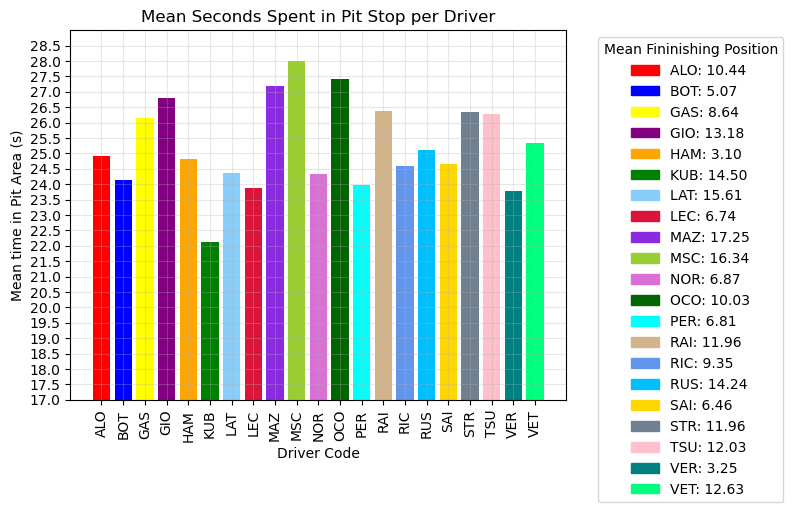

<Figure size 6000x6000 with 0 Axes>

In [41]:
# Plot drivers against their pit stop times 
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET']


plt.bar(drivers, df4, align='center', color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])
# Add customization
plt.xticks(rotation='vertical')
plt.title('Mean Seconds Spent in Pit Stop per Driver')
plt.ylabel('Mean time in Pit Area (s)')
plt.ylim(17,29)
list_yticks = np.arange(17, 29, 0.5)
plt.yticks(list_yticks)
plt.xlabel('Driver Code')
plt.grid(alpha = 0.3)

#Legend
red_patch = mpatches.Patch(color='red', label='ALO: 10.44')
blue_patch = mpatches.Patch(color='blue', label='BOT: 5.07')
yellow_patch = mpatches.Patch(color='yellow', label= 'GAS: 8.64')
purple_patch = mpatches.Patch(color = 'purple', label = 'GIO: 13.18')
orange_patch = mpatches.Patch(color = 'orange', label = 'HAM: 3.10')
green_patch = mpatches.Patch(color = 'green', label = 'KUB: 14.50')
lsb_patch = mpatches.Patch(color = 'lightskyblue', label = 'LAT: 15.61')
crimson_patch = mpatches.Patch(color = 'crimson', label = 'LEC: 6.74')
bv_patch = mpatches.Patch(color = 'blueviolet', label = 'MAZ: 17.25')
yg_patch = mpatches.Patch(color = 'yellowgreen', label = 'MSC: 16.34')
orchid_patch = mpatches.Patch(color = 'orchid', label = 'NOR: 6.87')
darkgreen_patch = mpatches.Patch(color = 'darkgreen', label = 'OCO: 10.03')
cyan_patch = mpatches.Patch(color = 'cyan', label = 'PER: 6.81')
tan_patch = mpatches.Patch(color = 'tan', label = 'RAI: 11.96')
cfb_patch = mpatches.Patch(color = 'cornflowerblue', label = 'RIC: 9.35')
dsb_patch = mpatches.Patch(color = 'deepskyblue', label = 'RUS: 14.24')
gold_patch = mpatches.Patch(color = 'gold', label = 'SAI: 6.46')
sg_patch = mpatches.Patch(color = 'slategray', label = 'STR: 11.96')
pink_patch = mpatches.Patch(color = 'pink', label = 'TSU: 12.03')
teal_patch = mpatches.Patch(color = 'teal', label = 'VER: 3.25')
sgg_patch = mpatches.Patch(color = 'springgreen', label = 'VET: 12.63')


plt.legend(title = 'Mean Fininishing Position', handles=[red_patch, blue_patch, yellow_patch, purple_patch, orange_patch, green_patch, lsb_patch,
                   crimson_patch, bv_patch, yg_patch, orchid_patch, darkgreen_patch, cyan_patch, tan_patch,
                   cfb_patch, dsb_patch, gold_patch, sg_patch, pink_patch, teal_patch, sgg_patch], bbox_to_anchor=(1.05, 1), loc='upper left');


plt.figure(figsize=(60,60))

plt.savefig('C:/Users/tsswi/OneDrive/Desktop/Fig_1.png')
plt.show()

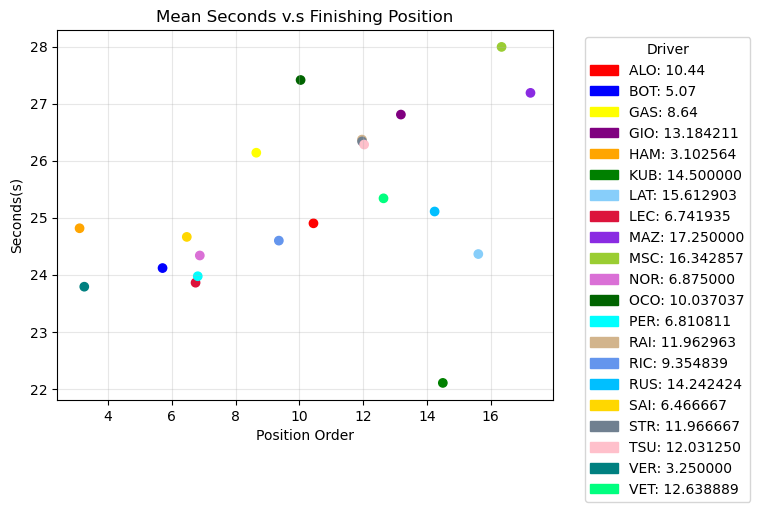

In [42]:
#input data
x=df5
y=df4
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET']

#plot
plt.scatter(x, y, color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])
#customize
plt.title('Mean Seconds v.s Finishing Position')
plt.ylabel('Seconds(s)')
#plt.ylim(17,29)
#list_yticks = np.arange(17, 29, 0.5)
#plt.yticks(list_yticks)
plt.xlabel('Position Order')
plt.grid(alpha = 0.3)

#Legend
red_patch = mpatches.Patch(color='red', label='ALO: 10.44')
blue_patch = mpatches.Patch(color='blue', label='BOT: 5.07')
yellow_patch = mpatches.Patch(color='yellow', label= 'GAS: 8.64')
purple_patch= mpatches.Patch(color='purple', label='GIO: 13.184211')
orange_patch= mpatches.Patch(color='orange', label='HAM: 3.102564')
green_patch= mpatches.Patch(color='green', label='KUB: 14.500000')
lsb_patch= mpatches.Patch(color='lightskyblue', label='LAT: 15.612903')
crimson_patch= mpatches.Patch(color='crimson', label='LEC: 6.741935')
bv_patch= mpatches.Patch(color='blueviolet', label='MAZ: 17.250000')
yg_patch= mpatches.Patch(color='yellowgreen', label='MSC: 16.342857')
orchid_patch= mpatches.Patch(color='orchid', label='NOR: 6.875000')
darkgreen_patch= mpatches.Patch(color='darkgreen', label='OCO: 10.037037')
cyan_patch= mpatches.Patch(color='cyan', label='PER: 6.810811')
tan_patch= mpatches.Patch(color='tan', label='RAI: 11.962963')
cfb_patch= mpatches.Patch(color='cornflowerblue', label='RIC: 9.354839')
dsb_patch= mpatches.Patch(color='deepskyblue', label='RUS: 14.242424')
gold_patch= mpatches.Patch(color='gold', label='SAI: 6.466667')
sg_patch= mpatches.Patch(color='slategray', label='STR: 11.966667')
pink_patch= mpatches.Patch(color='pink', label='TSU: 12.031250')
teal_patch= mpatches.Patch(color='teal', label='VER: 3.250000')
sgg_patch= mpatches.Patch(color='springgreen', label='VET: 12.638889')

plt.legend(title = 'Driver', handles=[red_patch, blue_patch, yellow_patch, purple_patch, orange_patch, green_patch, lsb_patch,
                   crimson_patch, bv_patch, yg_patch, orchid_patch, darkgreen_patch, cyan_patch, tan_patch,
                   cfb_patch, dsb_patch, gold_patch, sg_patch, pink_patch, teal_patch, sgg_patch], bbox_to_anchor=(1.05, 1), loc='upper left');

In [21]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(df4, df5)
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x,y)
regress_values = x * slope + intercept
#create line equation
line_eq = 'y = ' + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Print line equation
print(line_eq)

y = 0.15x + 23.66


The r-value is: 0.19665566103073265


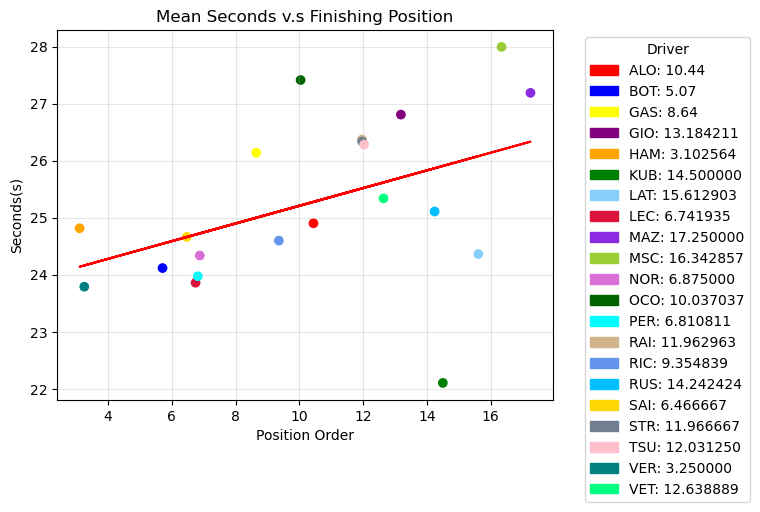

In [43]:
#input data
x=df5
y=df4
drivers = ['ALO', 'BOT', 'GAS', 'GIO', 'HAM', 'KUB', 'LAT', 'LEC', 'MAZ', 'MSC', 'NOR',  'OCO', 'PER', 'RAI', 'RIC', 'RUS', 'SAI', 'STR','TSU','VER','VET']

#plot
plt.scatter(x, y, color = ['red', 'blue', 'yellow', 'purple', 'orange', 'green', 'lightskyblue',
                                              'crimson', 'blueviolet', 'yellowgreen', 'orchid', 'darkgreen', 
                                              'cyan', 'tan', 'cornflowerblue', 'deepskyblue', 'gold', 'slategray',
                                              'pink', 'teal', 'springgreen'])
#customize
plt.title('Mean Seconds v.s Finishing Position')
plt.ylabel('Seconds(s)')
#plt.ylim(17,29)
#list_yticks = np.arange(17, 29, 0.5)
#plt.yticks(list_yticks)
plt.xlabel('Position Order')
plt.grid(alpha = 0.3)
plt.plot(x, regress_values, "r")
plt.annotate(line_eq, (10,5000), fontsize=15, color='r')

#Legend
red_patch = mpatches.Patch(color='red', label='ALO: 10.44')
blue_patch = mpatches.Patch(color='blue', label='BOT: 5.07')
yellow_patch = mpatches.Patch(color='yellow', label= 'GAS: 8.64')
purple_patch= mpatches.Patch(color='purple', label='GIO: 13.184211')
orange_patch= mpatches.Patch(color='orange', label='HAM: 3.102564')
green_patch= mpatches.Patch(color='green', label='KUB: 14.500000')
lsb_patch= mpatches.Patch(color='lightskyblue', label='LAT: 15.612903')
crimson_patch= mpatches.Patch(color='crimson', label='LEC: 6.741935')
bv_patch= mpatches.Patch(color='blueviolet', label='MAZ: 17.250000')
yg_patch= mpatches.Patch(color='yellowgreen', label='MSC: 16.342857')
orchid_patch= mpatches.Patch(color='orchid', label='NOR: 6.875000')
darkgreen_patch= mpatches.Patch(color='darkgreen', label='OCO: 10.037037')
cyan_patch= mpatches.Patch(color='cyan', label='PER: 6.810811')
tan_patch= mpatches.Patch(color='tan', label='RAI: 11.962963')
cfb_patch= mpatches.Patch(color='cornflowerblue', label='RIC: 9.354839')
dsb_patch= mpatches.Patch(color='deepskyblue', label='RUS: 14.242424')
gold_patch= mpatches.Patch(color='gold', label='SAI: 6.466667')
sg_patch= mpatches.Patch(color='slategray', label='STR: 11.966667')
pink_patch= mpatches.Patch(color='pink', label='TSU: 12.031250')
teal_patch= mpatches.Patch(color='teal', label='VER: 3.250000')
sgg_patch= mpatches.Patch(color='springgreen', label='VET: 12.638889')

plt.legend(title = 'Driver', handles=[red_patch, blue_patch, yellow_patch, purple_patch, orange_patch, green_patch, lsb_patch,
                   crimson_patch, bv_patch, yg_patch, orchid_patch, darkgreen_patch, cyan_patch, tan_patch,
                   cfb_patch, dsb_patch, gold_patch, sg_patch, pink_patch, teal_patch, sgg_patch], bbox_to_anchor=(1.05, 1), loc='upper left');

#Print the r value
print(f"The r-value is: {rvalue**2}")